<a href="https://colab.research.google.com/github/kryvosheyev/UCU-2021-ML-for-finances/blob/main/My_Portfolio_Dynamic_Allocation_Challenge_Dmytro_Kryvosheyev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do library imports

In [ ]:
! pip install yfinance
! pip install PyPortfolioOpt

     |████████████████████████████████| 6.3 MB 39.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=17aa1bfa2c0f0cc7dec7ee84d62bdf449e0a3d9d768c2bbc5e42d034c981045c
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 60 kB 6.7 MB/s 
     |████████████████████████████████| 2.7 MB 34.2 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
# import investpy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tqdm

In [ ]:
import scipy.optimize as sco
from sklearn.covariance import ShrunkCovariance, LedoitWolf, GraphicalLasso, OAS

In [ ]:
!python --version

Python 3.7.11


# Downloading data

In [ ]:
#etfs_etoro = open('etoro_etfs').readlines()
#etfs_etoro = [e.strip() for e in etfs_etoro]
etfs_etoro = 'AAXJ,ACWI,AGG,AMLP,AMZA,AOA,AOK,AOR,ARKF,ARKG,ARKK,ARKQ,ARKW,ASHR,BAR,BIL,BKLN,BLOK,BLV,BND,BNDX,BOND,BRZU,BSV,CIBR,CLOU,CNDX,CORN,CQQQ,DBA,DBO,DFEN,DGRO,DIA,DIV,DJP,DRIP,DUST,DVY,EEM,EFA,EMB,ERX,EWG,EWH,EWJ,EWL,EWN,EWT,EWW,EWY,EWZ,EZU,FAS,FAZ,FEZ,FIVG,FNGU,FREL,FTEC,FXI,GDX,GDXJ,GLD,GLDM,GUSH,HDV,HMMJ,HYG,IAEX.L,IAGG,IAPD.L,IAU,ABB,IBZL.L,IDEM.L,IDEV,IEF,IEFA,IEMG,IEML.L,IEUR,IFFF.L,IHI,IJH,IJJ,IJPE.L,IJR,ILTB,IMEU.L,IMIB.L,IMTB,INDA,IPAC,ISF.L,ISTB,ITOT,ITWN.L,IUKP.L,IUSA.L,IUSB,IUSG,IUSV,IVV,IVW,IWB,IWD,IWF,IWM,IWN,IWO,IWR,IWS,IXJ,IXUS,IYR,JDST,JETS,JNK,JNUG,JPST,KBE,KRE,KWEB,LABD,LABU.US,LIT,LQD,LQDE.L,MCHI,MDY,MINT,MTUM,MUB,NAIL,NRGU,NUGT,OIH,OUSA,PALL,PFF,PGX,PHYS,PPLT,PSLV,QQQ,QUAL,REET,REML,RSX,RWR,SCHD,SCHE,SCHF,SCHX,SCO,SDIV,SDOW,SDS,SEMB.L,SH,SHV,SHY,SKYY,SLV,SMH,SOXL,SOXS,SOXX,SPGP.L,SPHD,SPLV,SPXL,SPXS,SPXU,SPY,SPY5.L,SPYD,SPYG,SQQQ,SRTY,SSO,SVXY,SWDA.L,TAN,TFI,THD,TIP,TLT,TMF,TNA,TQQQ,TVIX,TZA,UCO,UDOW,UDVD,UGA,UNG,UPRO,USL,USMV,USO,USRT,UVXY,VB,VBK,VBR,VCIT,VCSH,VEA,VEU,VFH,VGK,VGT,VHT,VIG,VNQ,VO,VOE,VONG,VOO,VOOG,VOOV,VOX,VT.US,VTEB,VTI,VTIP,VTV,VUG,VWO,VXUS,VXX,VXXOLD,WCLD,WEAT,XBI,XCX5.L,XDJP.L,XIV,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOP,XS6R.L,YINN'
etfs_etoro = etfs_etoro.split(',');

In [ ]:
START_DATE = '2000-01-01'
END_DATE = '2021-08-01'

In [ ]:
all_dfs = {}
for etf in etfs_etoro:
    try:

        df = yf.download(etf.split('.')[0], 
                           start=START_DATE, 
                           end=END_DATE)
        df_close = df['Adj Close'].to_frame()
        df_close.columns = [etf]
        all_dfs[etf] = df_close

    except Exception as e:
        print(etf, e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
spx = yf.download('SPY', start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%***********************]  1 of 1 completed


# Creating a combined DataFrame

In [ ]:
close_df = pd.concat(list(all_dfs.values()), axis=1)

In [ ]:
close_df

,AAXJ,ACWI,AGG,AMLP,AMZA,AOA,AOK,AOR,ARKF,ARKG,ARKK,ARKQ,ARKW,ASHR,BAR,BIL,BKLN,BLOK,BLV,BND,BNDX,BOND,BRZU,BSV,CIBR,CLOU,CNDX,CORN,CQQQ,DBA,DBO,DFEN,DGRO,DIA,DIV,DJP,DRIP,DUST,DVY,EEM,...,VHT,VIG,VNQ,VO,VOE,VONG,VOO,VOOG,VOOV,VOX,VT.US,VTEB,VTI,VTIP,VTV,VUG,VWO,VXUS,VXX,VXXOLD,WCLD,WEAT,XBI,XCX5.L,XDJP.L,XIV,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOP,XS6R.L,YINN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.207954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.902416,NaN,15.853890,12.052902,19.444977,42.751869,13.756874,NaN,12.735128,22.068584,23.193350,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.897980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.749324,NaN,15.555470,11.526001,18.907768,40.582962,13.369497,NaN,12.350970,21.567799,22.495615,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.777512,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.399965,NaN,15.965805,11.435439,18.823496,39.980473,13.605711,NaN,12.662652,21.374317,22.218935,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.125435,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.820963,NaN,16.581303,11.937645,19.076300,38.655018,13.860812,NaN,12.640903,21.442602,22.471561,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.445129,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.811396,NaN,16.758499,12.135229,19.803120,39.329784,14.739515,NaN,12.749621,21.704376,23.530184,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,87.699997,102.349998,115.943504,33.966877,27.025925,70.940002,40.011082,56.279999,52.259998,83.980003,121.599998,79.839996,148.779999,38.119999,17.850000,91.470001,22.035927,46.400002,104.743042,86.344444,57.719105,111.520363,122.919998,82.258057,49.230000,28.709999,NaN,20.240000,70.930000,19.270000,12.83,22.860001,51.599998,350.795624,19.725214,27.969999,8.87,19.469999,115.599998,51.509998,...,253.479996,159.369995,105.900002,239.369995,140.529999,73.050003,405.410004,275.600006,143.619995,147.809998,104.459999,55.497910,227.919998,52.529999,138.619995,299.859985,50.970001,64.800003,29.850000,NaN,57.900002,6.70,124.220001,NaN,NaN,NaN,82.419998,83.930000,49.720001,36.470001,103.559998,154.440002,71.519997,46.279999,65.730003,130.630005,184.630005,84.699997,NaN,12.15
2021-07-27,85.529999,101.660004,116.213112,33.075333,26.322279,70.720001,39.991093,56.020000,50.750000,82.639999,118.620003,78.389999,145.729996,36.299999,17.889999,91.459999,21.986050,44.310001,105.551140,86.564095,57.799049,111.610168,120.620003,82.278038,48.889999,28.320000,NaN,20.250000,68.279999,19.160000,12.78,23.010000,51.580002,350.006989,19.745129,27.709999,9.42,19.320000,115.959999,50.470001,...,254.179993,159.220001,106.500000,238.50999

# General hyperparameters

In [ ]:
# we fit it every year
FIT_WINDOW = 20 * 12
# we wait and trade for 3 months
TRADE_WINDOW = 20 * 3

# Routines

in StrategyFeedForwardLoop,
within the loop we get the data for training, process, filter data,
fit the model to this data. Get weights from that model, then these weights are applied to future data.

We just work with a data chunk from the past, and we define this chuck as FIT_WINDOW. 


In [ ]:
class StrategyFeedForwardLoop:

    '''
        12345
    '''

    def __init__(self, dataset, benchmark_warm, window_fit, window_hold, 
                 processor, filter, allocator):

        self.dataset = dataset
        self.benchmark_warm = benchmark_warm
        self.window_fit = window_fit
        self.window_hold = window_hold
        self.data_length = self.dataset.shape[0]
        self.n_assets = self.dataset.shape[1]
        self.processor = processor
        self.filter = filter
        self.allocator = allocator

    def iterate(self):

        # TODO: iterate rolling or expanding way (to train on more data)

        self.historical_weights = [
            pd.DataFrame({
              'ticker': self.dataset.columns,
              'weight': np.zeros(self.n_assets)
            })
        ]
        self.results = self.benchmark_warm.pct_change().iloc[:self.window_fit].fillna(0.0).tolist()

        for i in tqdm.tqdm(range(self.window_fit, self.data_length, self.window_hold)):

            fit_window_i = self.dataset.iloc[i-self.window_fit:i]
            trade_window_i_returns = self.dataset.iloc[i:i+self.window_hold].pct_change().fillna(0.0)

            fit_window_i_processed = self.processor.fit_transform(fit_window_i)
            trade_window_i_returns_i_processed = self.processor.transform(trade_window_i_returns)

            fit_window_i_filtered = self.filter.fit_transform(fit_window_i_processed)
            trade_window_i_returns_i_filtered = self.filter.transform(trade_window_i_returns_i_processed)

            self.allocator.fit(fit_window_i_filtered)
            optimal_weights_i = self.allocator.get_weights()
            results_i = np.dot(
                trade_window_i_returns_i_filtered, 
                optimal_weights_i['weight'].values
                )

            self.historical_weights.append(optimal_weights_i)
            self.results.extend(results_i)

        return self.historical_weights, \
               pd.DataFrame(
                   self.results, 
                   columns = ['daily_returns'],
                   index = self.dataset.index
               )

In [ ]:
def weights_data_to_df(w_ml):
    all_columns = w_ml[0]['ticker'].values.tolist()
    all_data = dict(zip(all_columns, [[0.0] * len(w_ml)] * len(all_columns)))
    all_data = pd.DataFrame(all_data)
    for i, wi in enumerate(w_ml):
        for j, (t, w) in enumerate(zip(wi['ticker'].values, wi['weight'].values)):
            all_data[t].iloc[i] = w
    return all_data

# Equal Allocation

In [ ]:
class DataProcessorDropNan:

    def __init__(self):
        pass

    def fit(self, window_fit):
        self.nan_columns = window_fit.columns[window_fit.isna().any()].tolist()

    # for present data
    def fit_transform(self, window_fit):
        self.fit(window_fit)
        window_fit = window_fit.drop(columns = self.nan_columns)
        return window_fit

    # for future data from TRADE_WINDOW
    def transform(self, window_fit):
        window_fit = window_fit.drop(columns = self.nan_columns)
        return window_fit

class NoAssetFilter is for choosing which assets we want to trade.
Ideas: 
*   only those that have sharpe > 1. We do immediate filtering based on the past window
*   manually select some assets
*   only those that have volatility < 10%
*   do nothing, leave as is
*   sharpe > 1 or volatility > 5 % / 10 %




In [ ]:
class NoAssetFilter:

    def __init__(self):
        pass

    def fit(self, window_fit):
        pass

    def fit_transform(self, window_fit):
        return window_fit

    def transform(self, window_fit):
        return window_fit

In [ ]:
class CapitalAllocatorEqual:

    def __init__(self):
        pass

    def fit(self, window_fit):
        self.window_fit = window_fit
        self.n_assets_window = window_fit.shape[-1]
    
    def get_weights(self):
        optimal_weights = np.ones(self.n_assets_window) / self.n_assets_window
        return pd.DataFrame({
              'ticker': self.window_fit.columns,
              'weight': optimal_weights
        })

In [ ]:
equal_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    NoAssetFilter(),
    CapitalAllocatorEqual()
)

Here we validate how well our 3 classes performed.

In [ ]:
w_eq, r_eq = equal_strategy_loop.iterate()
w_eq_df = weights_data_to_df(w_eq)

100%|██████████| 87/87 [00:03<00:00, 25.73it/s]


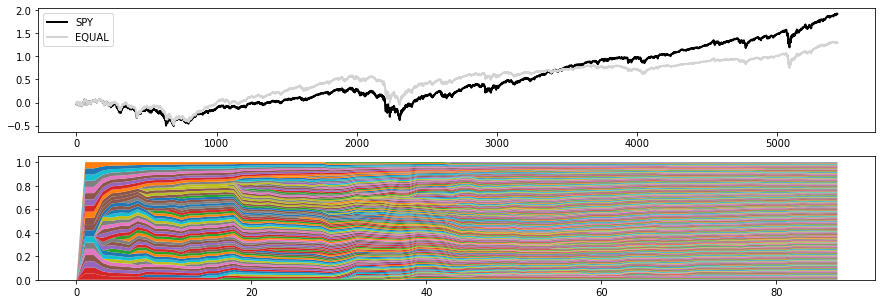

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)

# on the vertical line we see distribution of the classes
ax2.stackplot(
      np.arange(len(w_eq_df)),
      w_eq_df.T.values
)

ax1.legend()
plt.show()

# Top % Sharpe selection

In [ ]:
class AssetFilterTopPercentage:

    def __init__(self, top_p = 0.1):
        self.top_p = top_p

    def fit(self, window_fit):
        sharpes = window_fit.mean() / window_fit.std()
        sorted_sharpes = sharpes.sort_values()[::-1]
        TOP_N = int(len(sorted_sharpes) * self.top_p)
        self.top_assets = sorted_sharpes[:TOP_N].index.tolist()

    def fit_transform(self, window_fit):
        self.fit(window_fit)
        return window_fit.drop(columns = [c for c in window_fit.columns if c not in self.top_assets])

    def transform(self, window_fit):
        return window_fit.drop(columns = [c for c in window_fit.columns if c not in self.top_assets])

In [ ]:
top_sharpe_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    AssetFilterTopPercentage(0.5),
    CapitalAllocatorEqual()
)

In [ ]:
w_sharpe, r_sharpe = top_sharpe_strategy_loop.iterate()
w_sharpe_df = weights_data_to_df(w_sharpe)

100%|██████████| 87/87 [00:02<00:00, 30.57it/s]


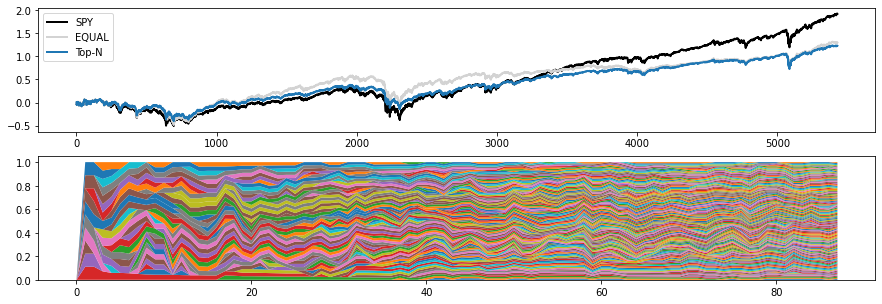

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)
ax1.plot(r_sharpe.cumsum().values, label = 'Top-N', lw = 2)

ax2.stackplot(
      np.arange(len(w_sharpe_df)),
      w_sharpe_df.T.values
)

ax1.legend()
plt.show()

# Global Minimal Variance

The GVM here is different from the code in Day 1.


In [ ]:
class CapitalAllocatorGMV:

    def __init__(self):
        pass

    def ret_risk(self, W, cov):
        return W.T@cov@W**0.5

    def fit(self, window_fit):
        self.window_fit = window_fit.pct_change().fillna(0.0)
        self.cov = GraphicalLasso().fit(self.window_fit).covariance_
    
    def get_weights(self):
        # action calculation
        n_assets_window = self.window_fit.shape[-1]
        W = np.ones(n_assets_window) / n_assets_window
        bnds = tuple((0.0, 1.0) for x in range(n_assets_window))
        cons = ({'type': 'eq', 'fun': lambda x : 1.0 - np.sum(x)})
        optimal_weights = sco.minimize(
                                  self.ret_risk, 
                                  W, 
                                  args=(self.cov),
                                  method='SLSQP',
                                  bounds=bnds,
                                  constraints=cons
                                  )
        optimal_weights = optimal_weights['x']
        optimal_weights /= sum(optimal_weights)
        return pd.DataFrame({
              'ticker': self.window_fit.columns,
              'weight': optimal_weights
        })

In [ ]:
gmv_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    NoAssetFilter(),
    CapitalAllocatorGMV()
)

In [ ]:
w_gmv, r_gmv = gmv_strategy_loop.iterate()
w_gmv_df = weights_data_to_df(w_gmv)

100%|██████████| 87/87 [00:19<00:00,  4.36it/s]


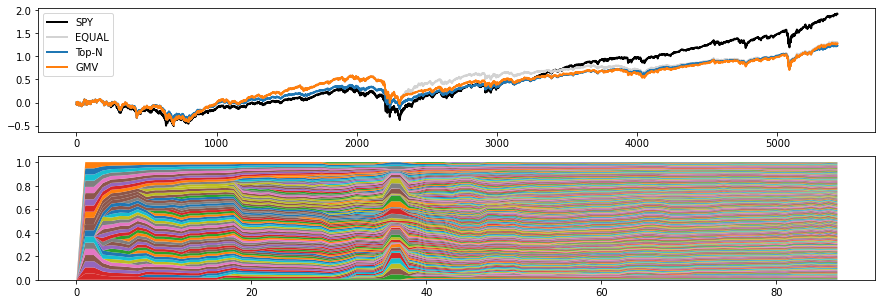

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)
ax1.plot(r_sharpe.cumsum().values, label = 'Top-N', lw = 2)
ax1.plot(r_gmv.cumsum().values, label = 'GMV', lw = 2)

ax2.stackplot(
      np.arange(len(w_gmv_df)),
      w_gmv_df.T.values
)

ax1.legend()
plt.show()

# CapitalAllocatorML

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
class CapitalAllocatorML:

    def __init__(self, model, train_window, forecast_horizon):
        self.model = model
        self.train_window = train_window
        self.forecast_horizon = forecast_horizon

    def extract_features(self, window_asset):
        xi_returns = window_asset.pct_change().fillna(0.0).values
        xi = [
            xi_returns.mean(axis=-1), 
            xi_returns.std(axis=-1), 
            xi_returns.min(axis=-1), 
            xi_returns.max(axis=-1)
        ]
        return np.array(xi)

    def fit(self, window_fit):

        X, Y = [], []
        for i in range(self.train_window, len(window_fit), self.forecast_horizon):

            x_i_window = window_fit.iloc[i-self.train_window:i]
            y_i_window = window_fit.iloc[i:i+self.forecast_horizon]

            for c in x_i_window.columns:
                x_i_window_asset = x_i_window[c]
                y_i_window_asset = y_i_window[c]

                xi = self.extract_features(x_i_window_asset)
                yi = (y_i_window_asset[-1] - y_i_window_asset[0]) / y_i_window_asset[0]
                yi = 0 if yi <= 0 else 1

                X.append(xi)
                Y.append(yi)

        X, Y = np.array(X), np.array(Y)
        self.model.fit(X, Y)
        self.window_fit = window_fit
    
    def get_weights(self):
        window_to_predict = self.window_fit.iloc[-self.train_window:].T
        xi_to_predict = self.extract_features(window_to_predict)
        predictions = self.model.predict_proba(
            xi_to_predict.T
        )[:, 1]
        optimal_weights = predictions / sum(predictions)
        return pd.DataFrame({
              'ticker': self.window_fit.columns,
              'weight': optimal_weights
        })

In [ ]:
ml_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    NoAssetFilter(),
    CapitalAllocatorML(
        LogisticRegression(), 
        TRADE_WINDOW, 
        TRADE_WINDOW
        )
)

In [ ]:
w_ml, r_ml = ml_strategy_loop.iterate()
w_ml_df = weights_data_to_df(w_ml)

100%|██████████| 87/87 [00:36<00:00,  2.36it/s]


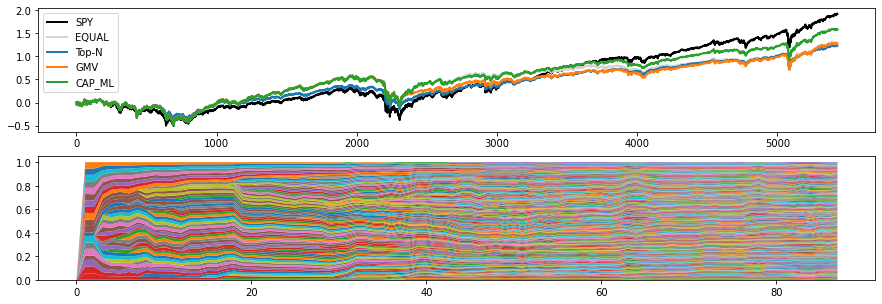

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)
ax1.plot(r_sharpe.cumsum().values, label = 'Top-N', lw = 2)
ax1.plot(r_gmv.cumsum().values, label = 'GMV', lw = 2)
ax1.plot(r_ml.cumsum().values, label = 'CAP_ML', lw = 2)

ax2.stackplot(
      np.arange(len(w_ml_df)),
      w_ml_df.T.values
)

ax1.legend()
plt.show()

# CapitalAllocatorEF

**bold text**# CapitalAllocator

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions

In [ ]:
class CapitalAllocatorEF:

    def __init__(self, shrinkage = False, shorting = False):
        self.shrinkage = shrinkage

    def fit(self, window_fit):
        self.window_fit = window_fit
        self.n_assets_window = window_fit.shape[-1]
        self.mu = expected_returns.mean_historical_return(self.window_fit, returns_data=False)
        self.S = risk_models.sample_cov(self.window_fit, returns_data=False)
        if self.shrinkage:
            self.S = CovarianceShrinkage(self.window_fit, returns_data=False).ledoit_wolf()
    
    def get_weights(self):
        try:
            # Optimize for maximal Sharpe ratio
          if self.shorting:
            ef = EfficientFrontier(self.mu, self.S, weight_bounds=(-1, 1))
          else:
            ef = EfficientFrontier(self.mu, self.S)
          optimal_weights = ef.max_sharpe()
          optimal_weights = pd.DataFrame([dict(optimal_weights)]).T.values.flatten()
          return pd.DataFrame({
                'ticker': self.window_fit.columns,
                'weight': optimal_weights
          })
        except:
            optimal_weights = np.ones(self.n_assets_window) / self.n_assets_window
            return pd.DataFrame({
                  'ticker': self.window_fit.columns,
                  'weight': optimal_weights
            })            


In [ ]:
cap_ef_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    NoAssetFilter(),
    # CapitalAllocatorHRP()
    CapitalAllocatorEF()
)

In [ ]:
w_cap_ef, r_cap_ef = cap_ef_strategy_loop.iterate()
w_cap_ef_df = weights_data_to_df(w_cap_ef)

100%|██████████| 87/87 [00:05<00:00, 15.12it/s]


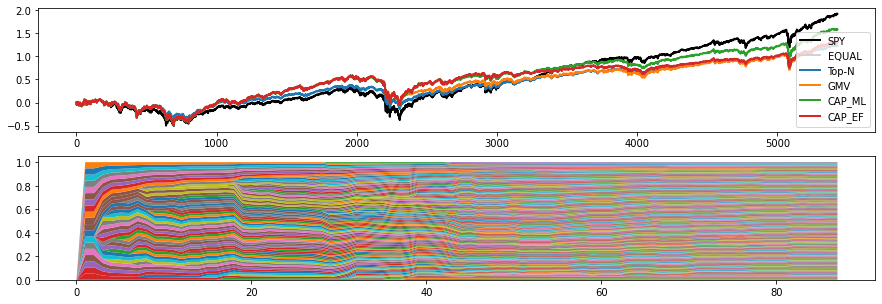

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)
ax1.plot(r_sharpe.cumsum().values, label = 'Top-N', lw = 2)
ax1.plot(r_gmv.cumsum().values, label = 'GMV', lw = 2)
ax1.plot(r_ml.cumsum().values, label = 'CAP_ML', lw = 2)
ax1.plot(r_cap_ef.cumsum().values, label = 'CAP_EF', lw = 2)

ax2.stackplot(
      np.arange(len(w_cap_ef_df)),
      w_cap_ef_df.T.values
)

ax1.legend()
plt.show()

# CapitalAllocatorHRP

In [ ]:
! pip install mlfinlab
! pip install portfoliolab
from portfoliolab.clustering.hrp import HierarchicalRiskParity

ModuleNotFoundError: ignored

In [ ]:
class CapitalAllocatorHRP:

    def __init__(self, shrinkage = True):
        self.shrinkage = shrinkage

    def fit(self, window_fit):
        self.window_fit = window_fit
        self.n_assets_window = window_fit.shape[-1]
        self.S = risk_models.sample_cov(self.window_fit, returns_data=True)
        if self.shrinkage:
            self.S = CovarianceShrinkage(self.window_fit, returns_data=True).ledoit_wolf()
    
    def get_weights(self):

        self.hrp = HierarchicalRiskParity()
        self.hrp.allocate(covariance_matrix=self.S, linkage='ward')
        optimal_weights = self.hrp.weights[self.window_fit.columns].T.values.flatten()

        try:
            return pd.DataFrame({
                  'ticker': self.window_fit.columns,
                  'weight': optimal_weights
            })
        except:
            optimal_weights = np.ones(self.n_assets_window) / self.n_assets_window
            return pd.DataFrame({
                  'ticker': self.window_fit.columns,
                  'weight': optimal_weights
            })

In [ ]:
cap_ef_strategy_loop = StrategyFeedForwardLoop(
    close_df,
    spx,
    FIT_WINDOW,
    TRADE_WINDOW,
    DataProcessorDropNan(),
    NoAssetFilter(),
    # CapitalAllocatorHRP()
    CapitalAllocatorEF(
        LogisticRegression(), 
        TRADE_WINDOW, 
        TRADE_WINDOW
        )
)

In [ ]:
w_cap_ef, r_cap_ef = cap_ef_strategy_loop.iterate()
w_cap_ef_df = weights_data_to_df(w_cap_ef)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

ax1.plot(spx.pct_change().cumsum().values, label = 'SPY', color = 'black', lw = 2)
ax1.plot(r_eq.cumsum().values, label = 'EQUAL', color = 'lightgrey', lw = 2)
ax1.plot(r_sharpe.cumsum().values, label = 'Top-N', lw = 2)
ax1.plot(r_gmv.cumsum().values, label = 'GMV', lw = 2)
ax1.plot(r_ml.cumsum().values, label = 'CAP_ML', lw = 2)
ax1.plot(r_cap_ef.cumsum().values, label = 'CAP_EF', lw = 2)

ax2.stackplot(
      np.arange(len(w_cap_ef_df)),
      w_cap_ef_df.T.values
)

ax1.legend()
plt.show()